# Evaluation Project - 3 (Restaurant Food Cost)

## Problem Statement

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this project, we will build a predicting model and try to predict the cost of the food served by the restaurants across different cities in India. You will investigate the factors that really affect the cost, and try to gain some very interesting insights that might help us to choose what to eat and from where.

### Data Set

**Size of training dataset:** 12,690 records

**Size of test dataset:** 4,231 records

### Objective

In this project we wll analyse the different variables and features of Restaurants all across the India and try to predict the cost of the food

In [1]:
#Let's load the necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visualziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for a clean notebook
import warnings
warnings.filterwarnings('ignore')

#Print all the librares are loaded successfully
print('All the Libraries are Loaded Successfully')

All the Libraries are Loaded Successfully


In [2]:
#Let's load the Data Set

food=pd.read_excel("C:/Users/Shubhham/Downloads/Data Trained/Restaurant Food Cost/Participants_Data_Final/Data_Train.xlsx")
print("Restaurants Food Cost dataset has been loaded successfully")

Restaurants Food Cost dataset has been loaded successfully


In [3]:
#Let's check the dataset

food.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


### FEATURES
    
**TITLE:** The feature of the restaurant which can help identify what and for whom it is suitable for.

**RESTAURANT_ID:** A unique ID for each restaurant.

**CUISINES:** The variety of cuisines that the restaurant offers.

**TIME:** The open hours of the restaurant.

**CITY:** The city in which the restaurant is located.

**LOCALITY:** The locality of the restaurant.

**RATING:** The average rating of the restaurant by customers.

**VOTES:** The overall votes received by the restaurant.

**COST:** The average cost of a two-person meal.

## Featured Engineering

### Data Preprocessing

In [4]:
#Let's check the shape of our DataSet

food.shape

(12690, 9)

We have 12690 rows and 9 columns in our dataset

In [5]:
#Let's check the value counts in each columns

for i in food.columns:
    print(food[i].value_counts())
    print('\n')

QUICK BITES                    4218
CASUAL DINING                  3652
None                           1003
CAFÉ                            607
DESSERT PARLOR                  382
                               ... 
BAR,CLUB                          1
MICROBREWERY,LOUNGE               1
BEVERAGE SHOP,CASUAL DINING       1
MEAT SHOP                         1
PUB,CAFÉ                          1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                         532
North Indian                                         526
North Indian, Chinese                                501
Fast Food                                            286
Chinese                                              167
                                                    ... 
North Indian, Chinese, European, Italian, Mexican

### Observations:
    
    1- In rating column we have 'new' and '-' in our dataset whihc
       needs to be replaced.
    
    2- In votes column votes suffix needs to be replaced from the 
       column.

In [6]:
#Let's check the unique values in each columns

for i in food.columns:
    print("Unique values in", i, food[i].nunique())

Unique values in TITLE 113
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


We can observe all the unique value counts in all the columns

In [7]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


### Observations:
    
    1- We have 12690 rows and 9 columns in our dataset
    
    2- City, Locality, Rating and  Votes have missing values in our
       dataset
        
    3- We have two types of datatypes in our dataset i.e. object and
       int64

In [8]:
#Let's check the numeric columns details

numeric_features=food.select_dtypes(include=[np.number])
numeric_features.columns

Index(['RESTAURANT_ID', 'COST'], dtype='object')

In [9]:
#Let's check the catagorical columns details

catagorical_features=food.select_dtypes(include=[np.object])
catagorical_features.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES'], dtype='object')

### Data Cleaning

In [10]:
#Let's extract the closed time i.e. on which day restraunt is closed in a week in our dataset

import re
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'Open All Days'

food['CLOSED'] = food['TIME'].apply(extract_closed)

In [11]:
food['TIME'] = food['TIME'].str.replace(r'Closed \(.*?\)','')
food['TIME'] = food['TIME'].str.replace(r'Closed...','')

In [12]:
#Let's check the unique value in Rating column

food['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [13]:
#Let's replace the new and '-' value

food['RATING'] = food['RATING'].str.replace('NEW', 'nan')
food['RATING'] = food['RATING'].str.replace('-', 'nan').astype(float)

In [14]:
#Let's check the median value for imputing

food['RATING'].median()

3.8

In [15]:
#Let's change the dtypes of vote column

food['VOTES'] = food['VOTES'].str.replace(' votes', '').astype(float)

In [16]:
#Let's impute the missing, null and nan values in our dataset

food['RATING'].fillna(3.8, inplace=True)  #Impute with Median
food['VOTES'].fillna(44.0, inplace=True)  #Impute with Mode 

In [17]:
#Let's replace the null values in City and Locality columns with 'Others'

food.CITY.fillna("Others",inplace=True)
food.LOCALITY.fillna("Others",inplace=True)

In [18]:
#Let's change the dtype of cost column

food['COST'] = food['COST'].astype(float)

In [19]:
#Let's check the value counts in each columns

for i in food.columns:
    print(food[i].value_counts())
    print('\n')

QUICK BITES                    4218
CASUAL DINING                  3652
None                           1003
CAFÉ                            607
DESSERT PARLOR                  382
                               ... 
BAR,CLUB                          1
MICROBREWERY,LOUNGE               1
BEVERAGE SHOP,CASUAL DINING       1
MEAT SHOP                         1
PUB,CAFÉ                          1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                         532
North Indian                                         526
North Indian, Chinese                                501
Fast Food                                            286
Chinese                                              167
                                                    ... 
North Indian, Chinese, European, Italian, Mexican

In [20]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  object 
 5   LOCALITY       12690 non-null  object 
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  float64
 9   CLOSED         12690 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 991.5+ KB


### Observations:
    
    1- We have successfully imputed all the missig values
    
    2- We have now three datatypes in our dataset i.e.
       object, float and int

In [21]:
#Let's check for the null values in our DataSet

food.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
CLOSED           0
dtype: int64

We can observe that there are no null values

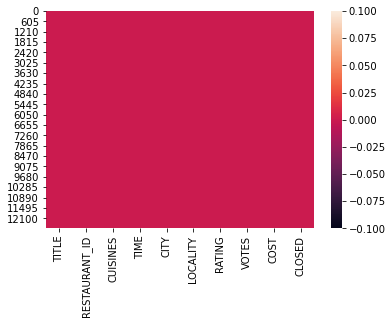

In [22]:
#Let's plot the heat map for null values

sns.heatmap(food.isnull())
plt.show()

We have successfully imputed all the missing and null values in our dataset

## Exploratory Data Analysis

In [23]:
#Let's check the statistic Matrix

food.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.786832,380.405753,655.252246
std,4504.874150,0.401588,809.110447,627.003540
min,0.000000,2.000000,4.000000,20.000000
25%,3863.250000,3.600000,44.000000,300.000000
50%,7740.000000,3.800000,132.000000,500.000000
75%,11688.750000,4.000000,405.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


### Observations:
    
    1- We have 12690 rows in our dataset
    
    2- Mean is greater than median for all the columns which
       means our data is positively skewed
        
    3- Standard deviation for Restaurant ID is high it means
       data is spread througout and is not clustered around the 
       mean
    
    4- After observing the 75% and 100% we can cleary say that
       in votes and cost column we have outliers present
    

In [24]:
#Let's check the correlation

food.corr().style.background_gradient(cmap='coolwarm')

,RESTAURANT_ID,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.030937,0.000403,0.040710
RATING,0.030937,1.000000,0.343333,0.318653
VOTES,0.000403,0.343333,1.000000,0.255723
COST,0.040710,0.318653,0.255723,1.000000


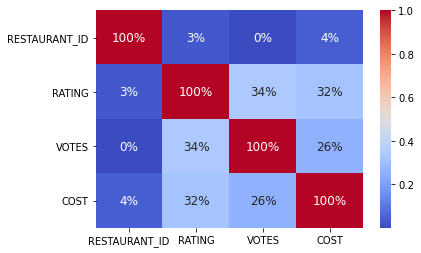

In [25]:
#Let's plot the heat map for the correlation matrix

sns.heatmap(food.corr(),annot=True,cmap='coolwarm',annot_kws={"size":12},fmt='0.0%');

### Observations:
    
    1- We do not have any negative correlation in our dataset
    
    2- Votes, rating and cost have very low positive correlation with
       each other
        
    3- cost and restaurant id also have very very low positive             correlation

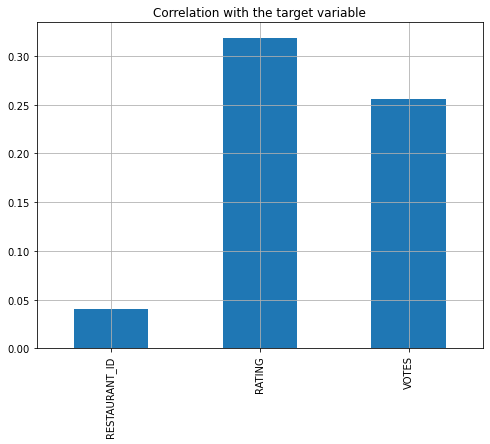

In [26]:
#Let's check the correlation with our target variable

plt.figure(figsize=(8,6))
food.drop('COST',axis=1).corrwith(food['COST']).plot(kind='bar',grid=True)
plt.title("Correlation with the target variable");

We can clearly observe from the above graph that rating and votes have very good positive relationship with the target variable

## Data Visualization

### Univariate Analysis

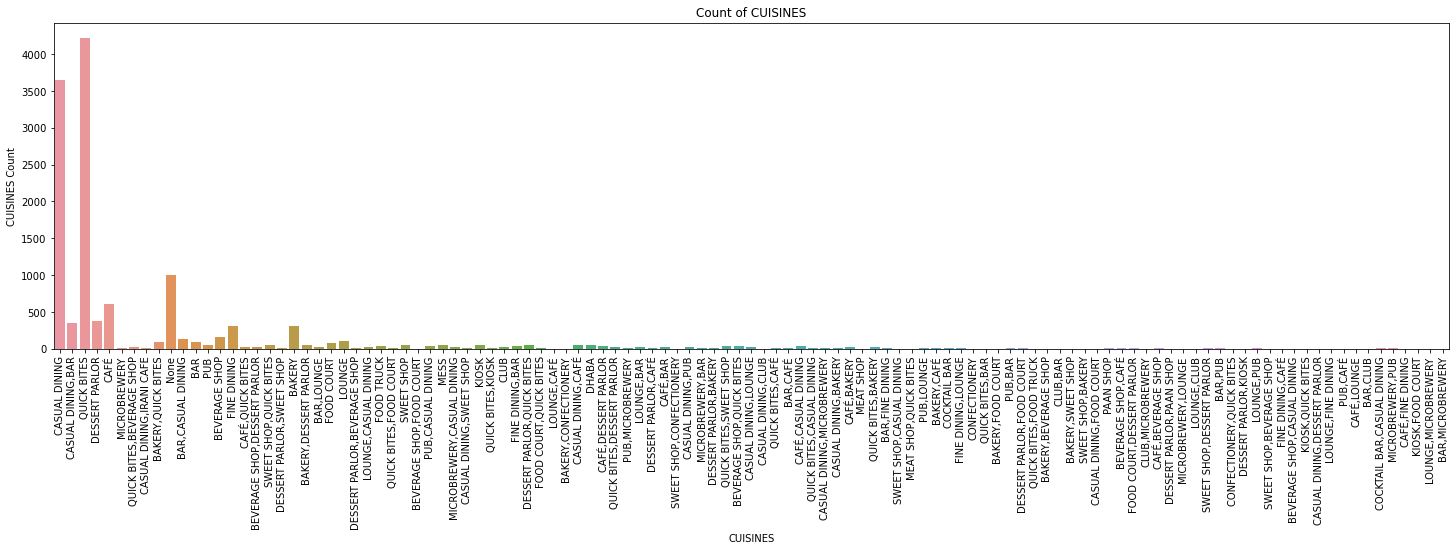

QUICK BITES                    4218
CASUAL DINING                  3652
None                           1003
CAFÉ                            607
DESSERT PARLOR                  382
                               ... 
BAR,CLUB                          1
MICROBREWERY,LOUNGE               1
BEVERAGE SHOP,CASUAL DINING       1
MEAT SHOP                         1
PUB,CAFÉ                          1
Name: TITLE, Length: 113, dtype: int64


In [27]:
plt.subplots(figsize=(25,6))
sns.countplot(x='TITLE',data=food)
plt.title("Count of CUISINES")
plt.xlabel("CUISINES")
plt.ylabel("CUISINES Count")
plt.xticks(rotation=90)
plt.show()
print(food['TITLE'].value_counts())

#### We can observe that Quick bite is the most prefered cusine and followed by casual dining

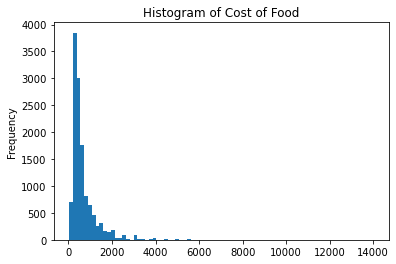

In [28]:
food['COST'].plot.hist(bins=80)
plt.title('Histogram of Cost of Food')
plt.show()

#### We can observe the cost of the food is positively skewed

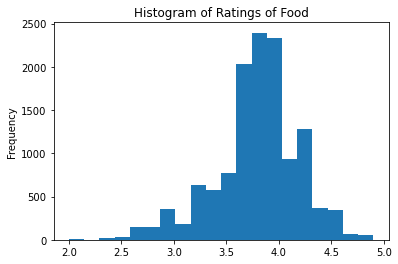

In [29]:
food['RATING'].plot.hist(bins=20)
plt.title('Histogram of Ratings of Food')
plt.show()

#### We can observe that the maximum rating ranges from 3.5 to 4.5

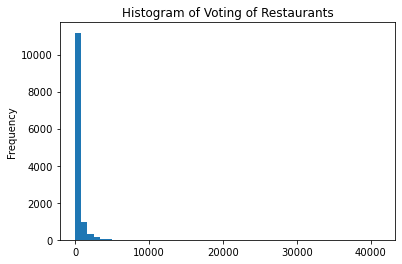

In [30]:
food['VOTES'].plot.hist(bins=50)
plt.title('Histogram of Voting of Restaurants')
plt.show()

### We can observe that most of the votings is positively skewed

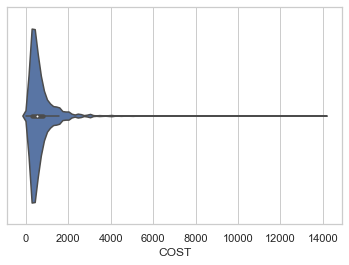

In [31]:
sns.set(style='whitegrid')
sns.violinplot(food['COST'])
plt.show()

#### We can observe that median is somewhere around 800 to 100 and there are outliers present in the dataset

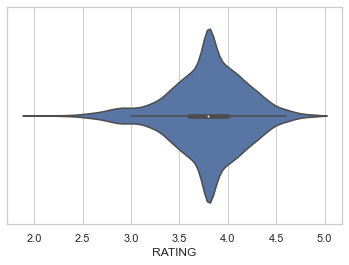

In [32]:
sns.set(style='whitegrid')
sns.violinplot(food['RATING'])
plt.show()

#### We can observe that the median is around 3.6 to 3.9 and the data is clustered around the mean

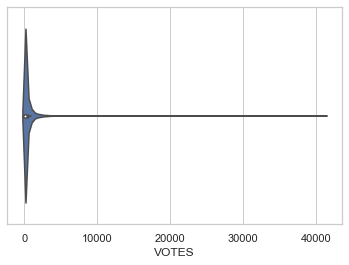

In [33]:
sns.set(style='whitegrid')
sns.violinplot(food['VOTES'])
plt.show()

#### We can observe the data is skewed and there are outlier present

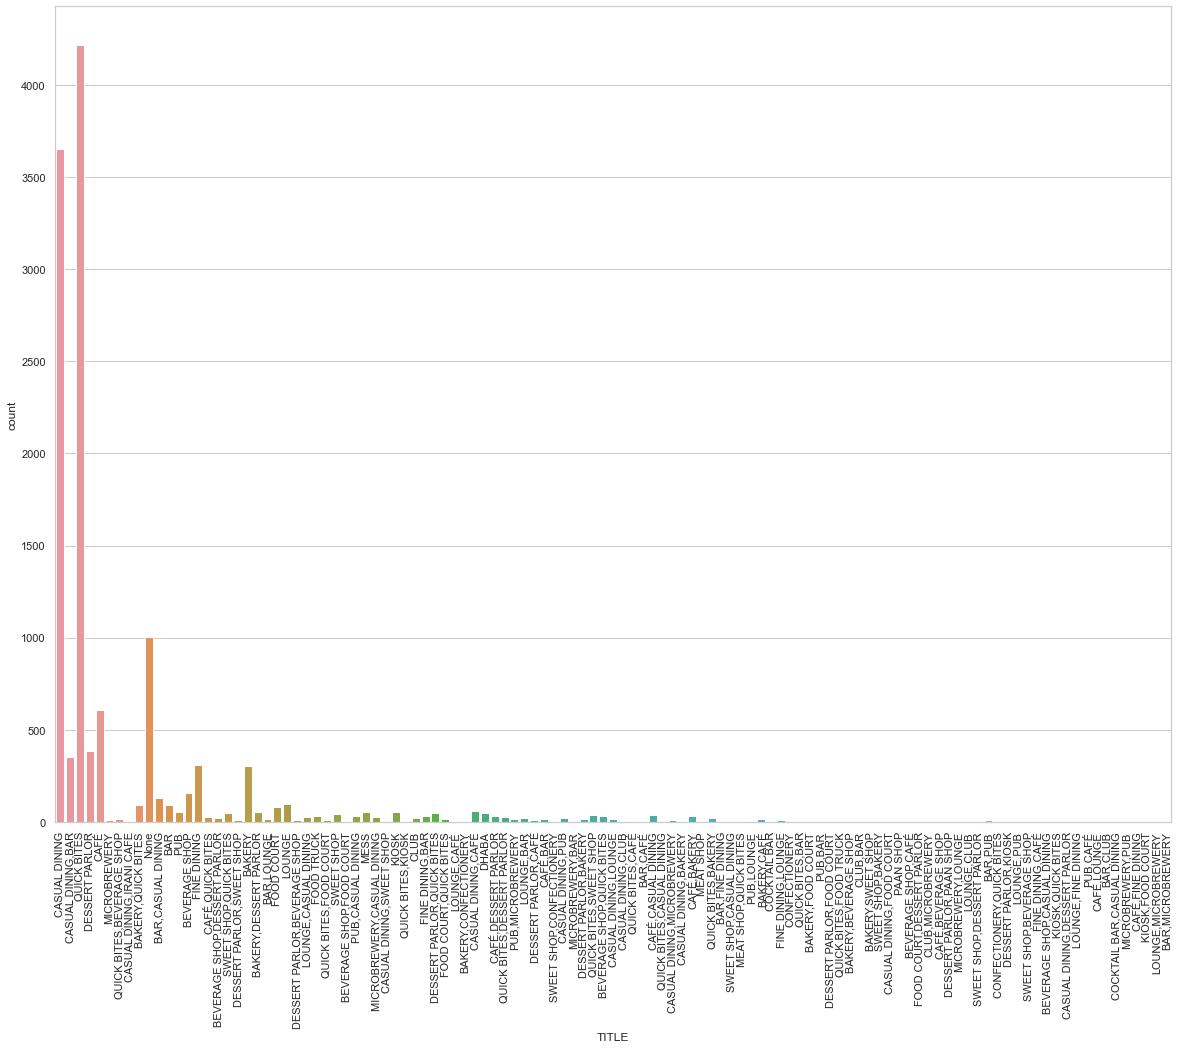

In [34]:
plt.figure(figsize=(20,15))
sns.countplot(food['TITLE'])
plt.xticks(rotation=90)
plt.show()

#### We can observe that the Quick biting and casual dining is more prefered 

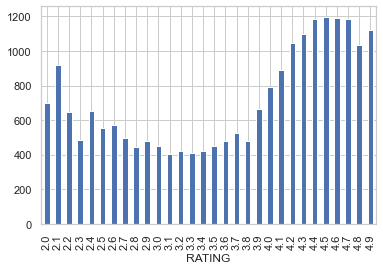

In [35]:
food.groupby(['RATING'])['COST'].mean().plot(kind='bar');

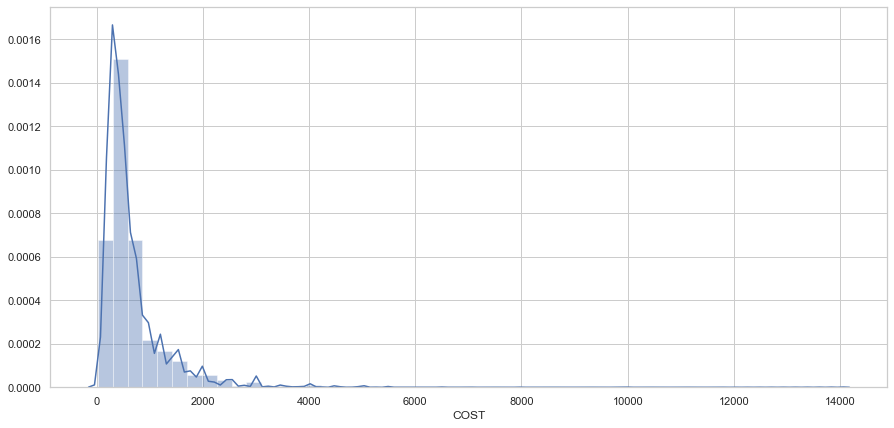

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(food['COST'].sort_values(), ax=ax)
plt.show()

#### We can observe that the data is positively skewed and maximum is around 500 to 600

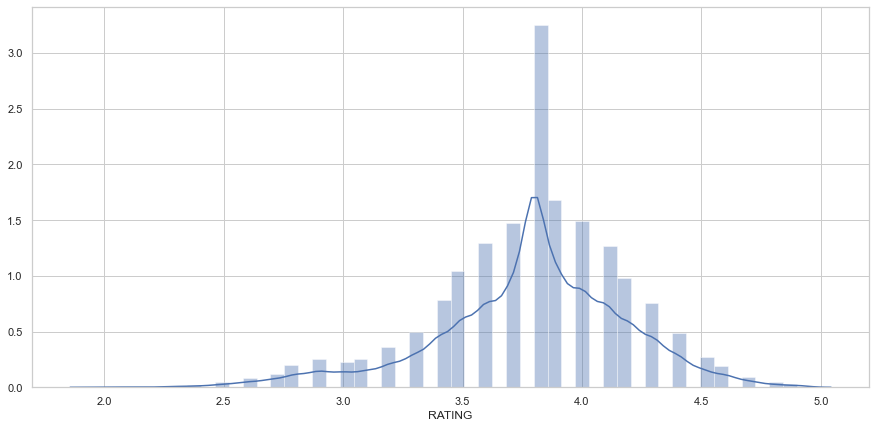

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(food['RATING'].sort_values(), ax=ax)
plt.show()

#### We can observe that the maximum rating is around 3.7 and the data is normally distributed

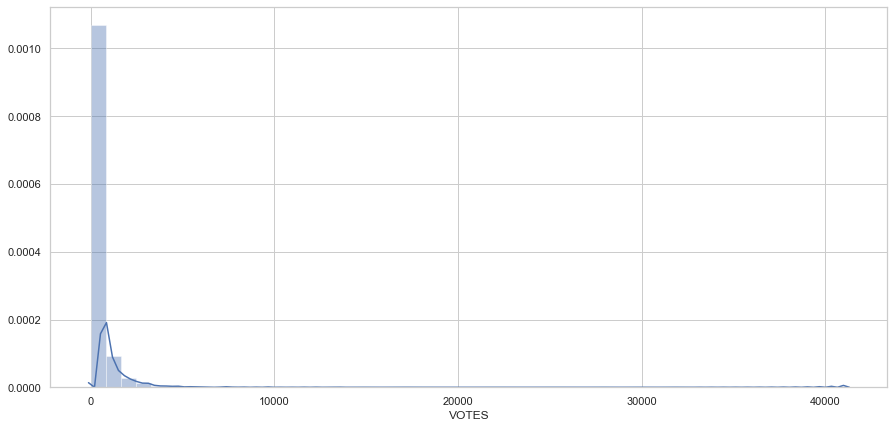

In [38]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(food['VOTES'].sort_values(), ax=ax)
plt.show()

## Bivariate Analysis

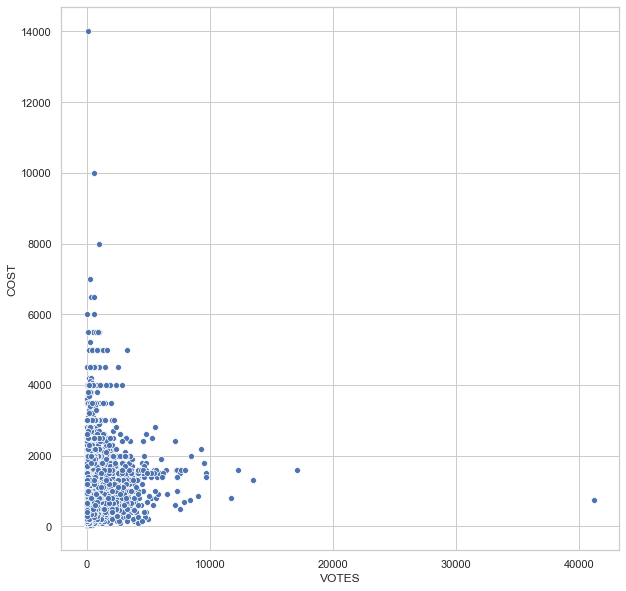

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='COST',x='VOTES',data=food)
plt.show()

#### We can observe that the with increase in the cost the number of votes are decreased and they are clustered around

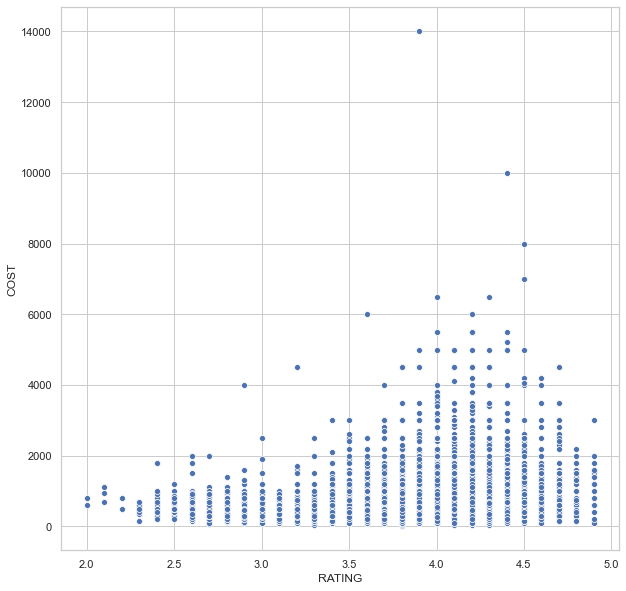

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='COST',x='RATING',data=food)
plt.show()

#### We can observe that with increase in the price the rating also improves

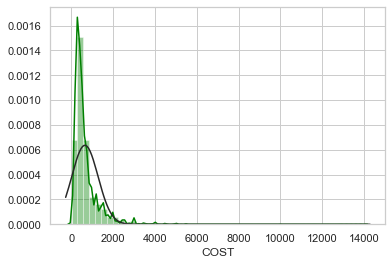

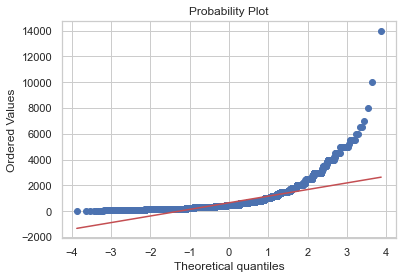

In [41]:
from scipy import stats
from scipy.stats import norm
sns.distplot(food['COST'], fit = norm, color = 'Green')
fig= plt.figure()
res = stats.probplot(food['COST'], plot = plt)

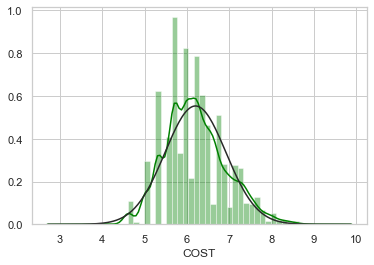

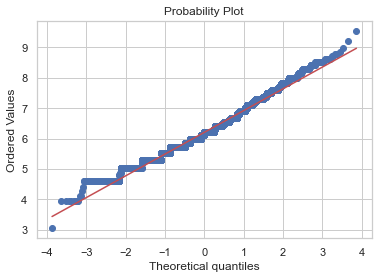

In [42]:
food['COST']= np.log1p(food['COST'])
sns.distplot(food['COST'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(food['COST'],plot = plt)

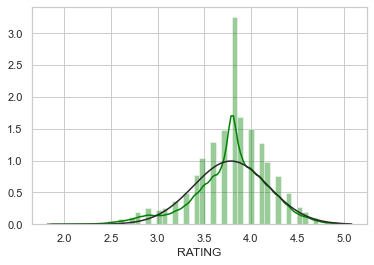

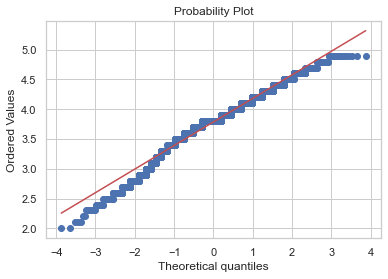

In [43]:
sns.distplot(food['RATING'], fit = norm, color = 'Green')
fig= plt.figure()
res = stats.probplot(food['RATING'], plot = plt)

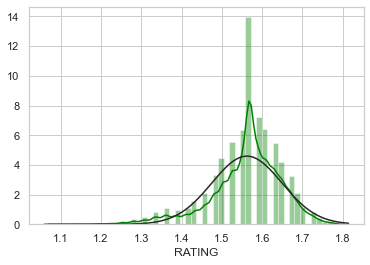

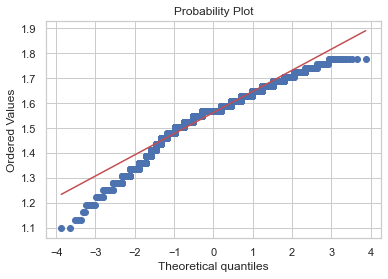

In [44]:
food['RATING']= np.log1p(food['RATING'])
sns.distplot(food['RATING'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(food['RATING'],plot = plt)

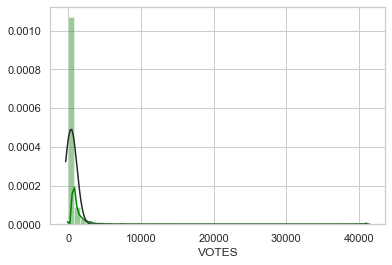

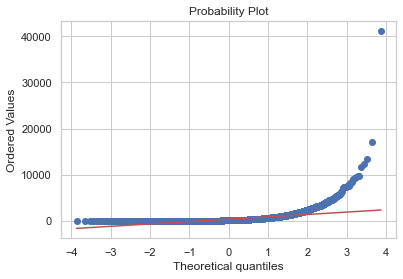

In [45]:
sns.distplot(food['VOTES'], fit = norm, color = 'Green')
fig= plt.figure()
res = stats.probplot(food['VOTES'], plot = plt)

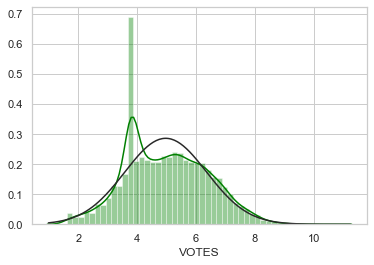

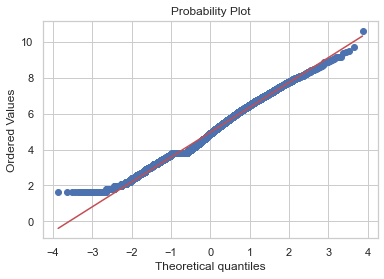

In [46]:
food['VOTES']= np.log1p(food['VOTES'])
sns.distplot(food['VOTES'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(food['VOTES'],plot = plt)

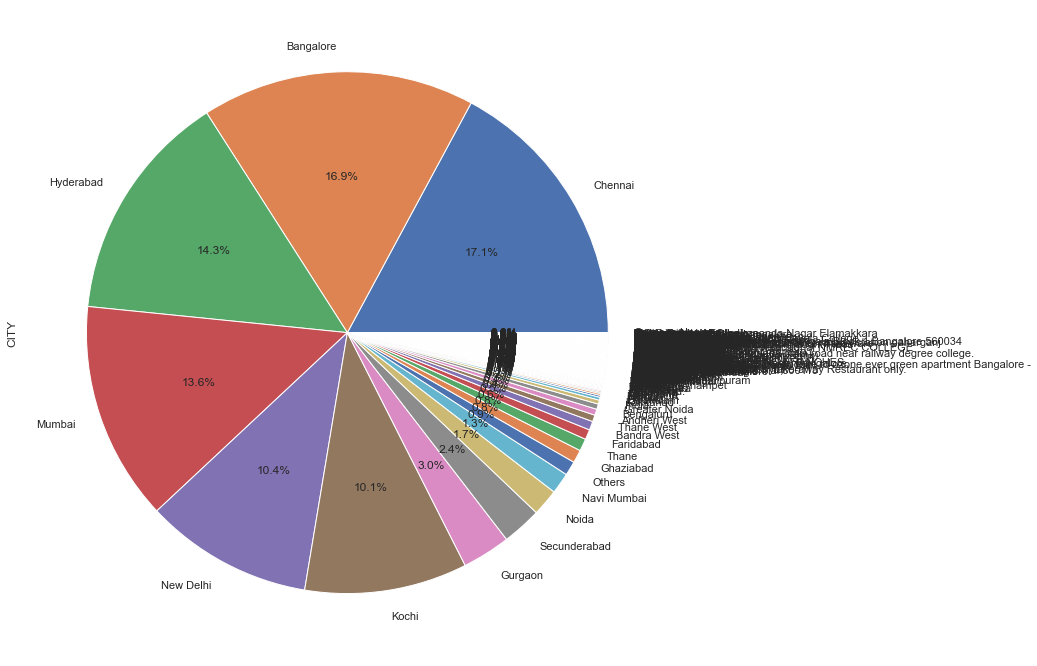

In [47]:
#Nominal variable representation using pie chart

food['CITY'].value_counts().plot.pie(figsize = (12,12), autopct = '%.1f%%')

#### We can observe that major foddies are from metro cities

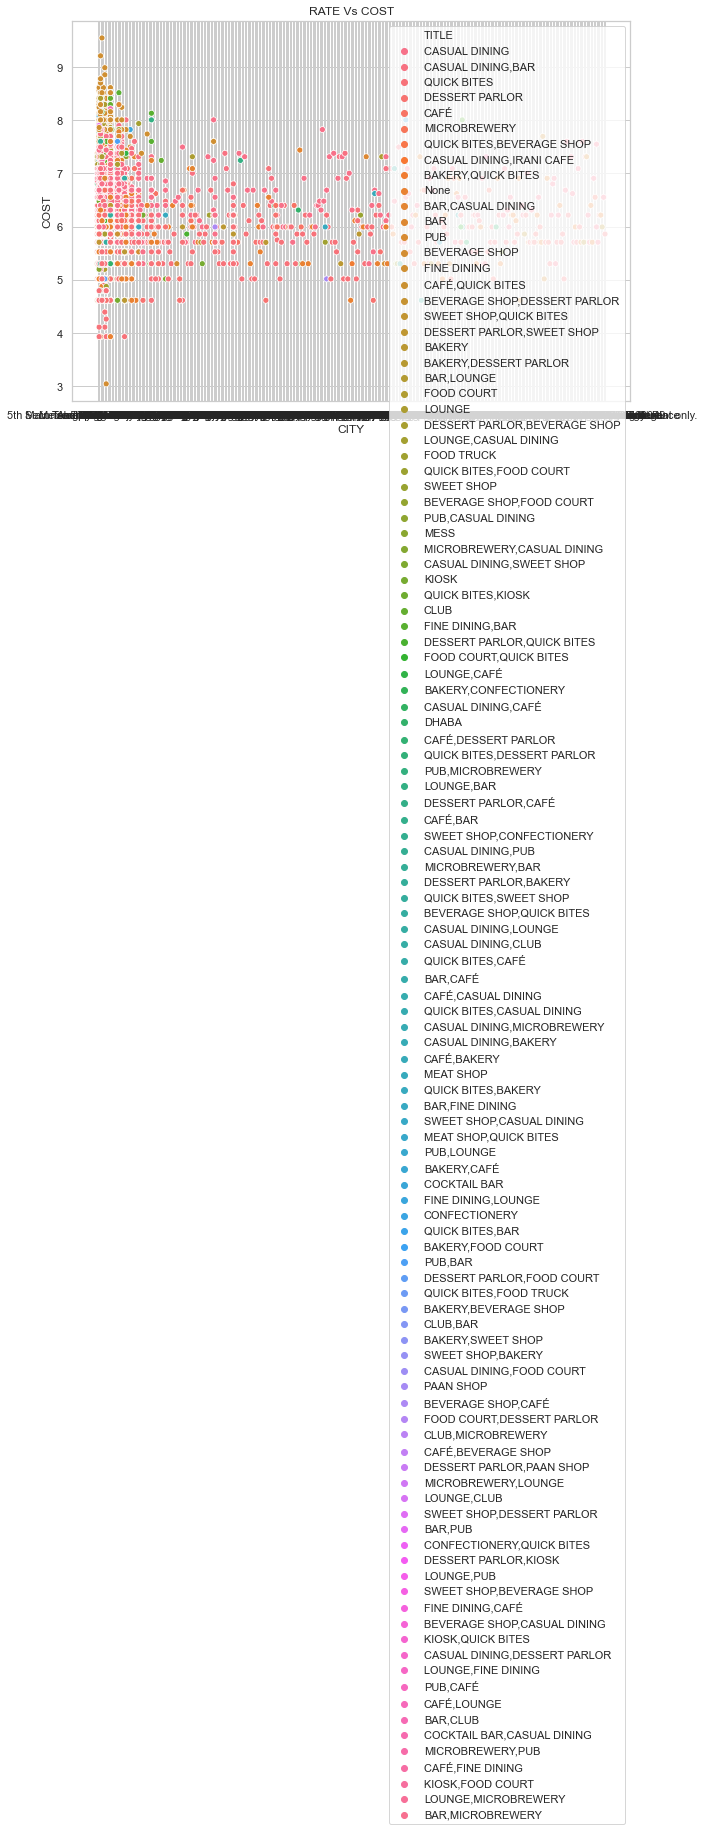

In [48]:
#Scatter plot to check the relationship

plt.figure(figsize = (10,7))
sns.scatterplot(x = "CITY", y = "COST", hue = "TITLE", data = food)
plt.title("RATE Vs COST")
plt.show()

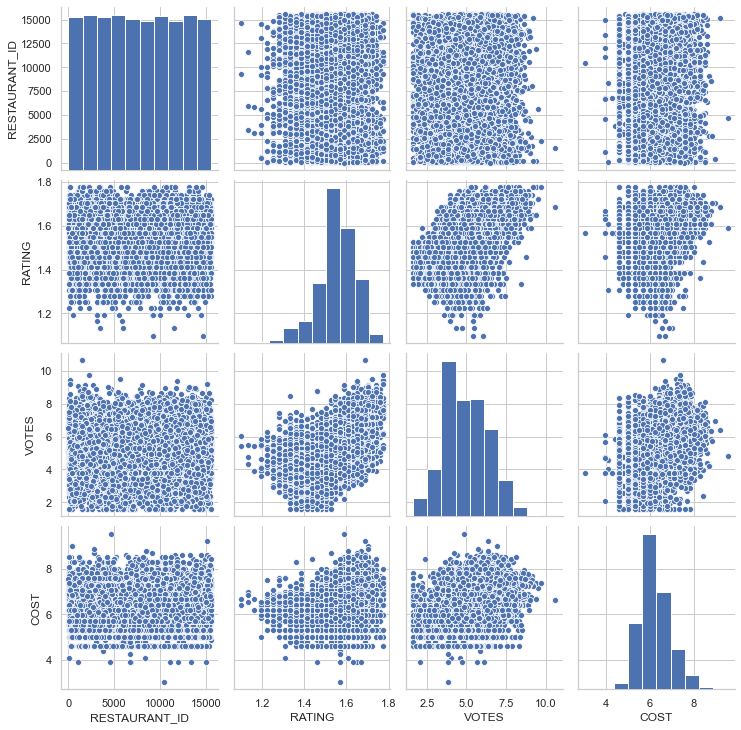

In [49]:
sns.pairplot(food);

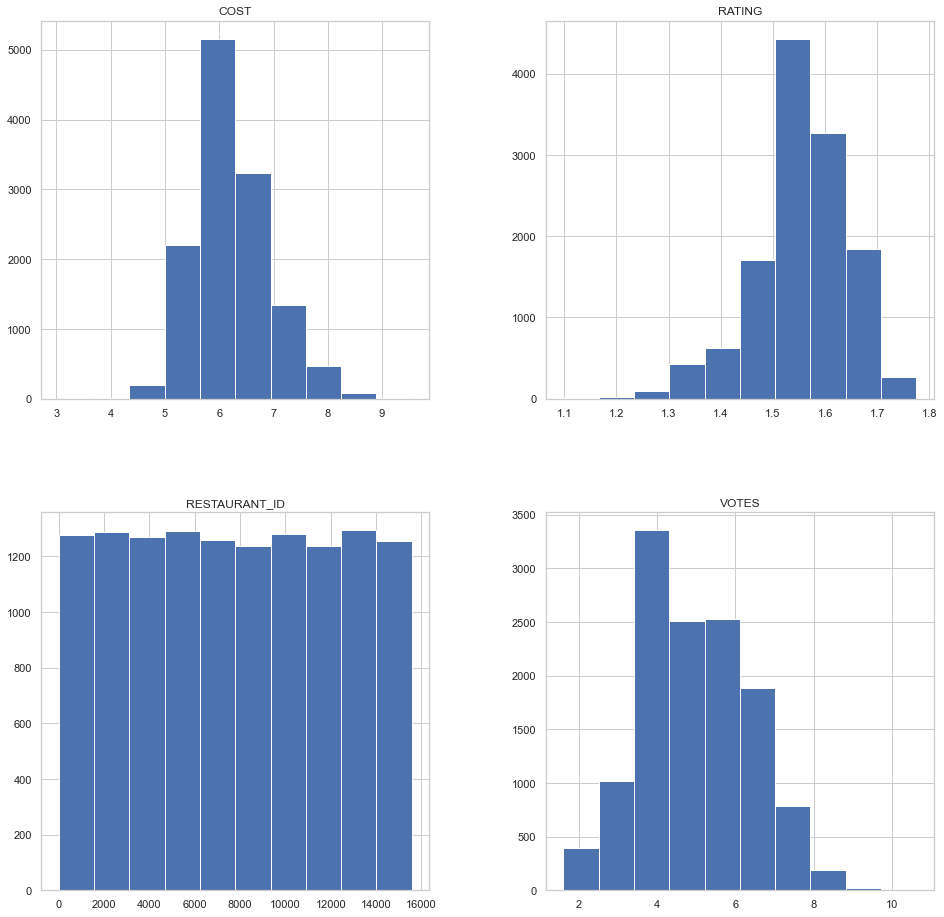

In [50]:
#Let's plot the histogram

food.hist(figsize=(16,16));

## Plotting Outliers

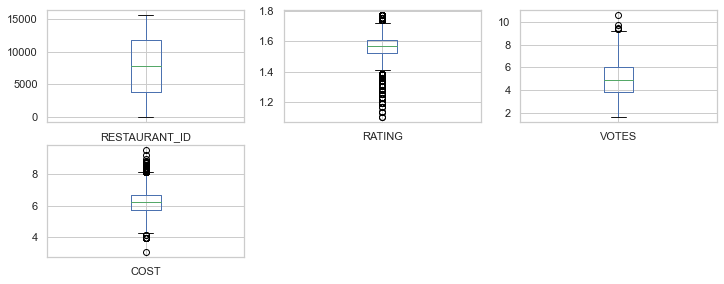

In [51]:
#Let's check the outliers

food.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

#### We can observe that the Ratings, votes and cost have outliers

In [52]:
#Let's encode our dataset

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(food.columns)):
    food[food.columns[column]]=le.fit_transform(food[food.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)


In [53]:
mappings

[{0: 'BAKERY',
  1: 'BAKERY,BEVERAGE SHOP',
  2: 'BAKERY,CAFÉ',
  3: 'BAKERY,CONFECTIONERY',
  4: 'BAKERY,DESSERT PARLOR',
  5: 'BAKERY,FOOD COURT',
  6: 'BAKERY,QUICK BITES',
  7: 'BAKERY,SWEET SHOP',
  8: 'BAR',
  9: 'BAR,CAFÉ',
  10: 'BAR,CASUAL DINING',
  11: 'BAR,CLUB',
  12: 'BAR,FINE DINING',
  13: 'BAR,LOUNGE',
  14: 'BAR,MICROBREWERY',
  15: 'BAR,PUB',
  16: 'BEVERAGE SHOP',
  17: 'BEVERAGE SHOP,CAFÉ',
  18: 'BEVERAGE SHOP,CASUAL DINING',
  19: 'BEVERAGE SHOP,DESSERT PARLOR',
  20: 'BEVERAGE SHOP,FOOD COURT',
  21: 'BEVERAGE SHOP,QUICK BITES',
  22: 'CAFÉ',
  23: 'CAFÉ,BAKERY',
  24: 'CAFÉ,BAR',
  25: 'CAFÉ,BEVERAGE SHOP',
  26: 'CAFÉ,CASUAL DINING',
  27: 'CAFÉ,DESSERT PARLOR',
  28: 'CAFÉ,FINE DINING',
  29: 'CAFÉ,LOUNGE',
  30: 'CAFÉ,QUICK BITES',
  31: 'CASUAL DINING',
  32: 'CASUAL DINING,BAKERY',
  33: 'CASUAL DINING,BAR',
  34: 'CASUAL DINING,CAFÉ',
  35: 'CASUAL DINING,CLUB',
  36: 'CASUAL DINING,DESSERT PARLOR',
  37: 'CASUAL DINING,FOOD COURT',
  38: 'CASUAL DINING,I

In [54]:
#Let's check for the outliers

from scipy.stats import zscore
z_score=abs(zscore(food))
print(food.shape)
food_final=food.loc[(z_score<3).all(axis=1)]
print(food_final.shape)

(12690, 10)
(11853, 10)


In [55]:
food=food_final
food.shape

(11853, 10)

In [56]:
#Let's check the skewness of our DataSet

food.skew()

TITLE            -0.092262
RESTAURANT_ID     0.008415
CUISINES         -0.218778
TIME              0.309133
CITY              0.248914
LOCALITY          0.320168
RATING           -0.451387
VOTES             1.795569
COST              1.201922
CLOSED          -10.930057
dtype: float64

In [57]:
# Let's treat the skewness

food.skew()
for col in food.skew().index:
    if col in food.describe().columns:
        if food[col].skew()>0.55:
            food[col]=np.sqrt(food[col])
        if food[col].skew()<-0.55:
            food[col]=np.cbrt(food[col])  

In [58]:
# Let's treat the skewness
#for col in food.columns:
 #   if food[col].skew()>0.55:
  #      food[col]=np.log1p(food[col])

In [59]:
#Let's recheck the skewness of our DataSet

food.skew()

TITLE            -0.092262
RESTAURANT_ID     0.008415
CUISINES         -0.218778
TIME              0.309133
CITY              0.248914
LOCALITY          0.320168
RATING           -0.451387
VOTES             0.956430
COST              0.551240
CLOSED          -11.234333
dtype: float64

## Model Prepration and Modelling

In [60]:
#Let's assign the value of x and y for training and testing

x = food.drop(['COST'],axis=1)
y = food['COST']

In [61]:
# Let's scale the data using standard scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc=pd.DataFrame(x_sc,columns=x.columns)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 170 is 0.3402440331135609


In [63]:
#Let's split the data for testing and training

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=170)

In [64]:
#Let's check the shape

print(x.shape,'\t\t',y.shape)

(11853, 9) 		 (11853,)


In [65]:
#Lets import all the metrics and regressors

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from xgboost.sklearn import XGBRegressor

In [66]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()
XGB = XGBRegressor()

In [67]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=170, shuffle=True)

In [69]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
RMAE = []

for name,model in models:
    
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    
    sc = cross_val_score(model,x,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error: {}".format(mse))
    MSE.append(mse)
    
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error: {}".format(mae))
    MAE.append(mae)
    
    rmae = np.sqrt(mean_absolute_error(y_test,pre))
    print("Root Mean absolute error: {}".format(rmae))
    RMAE.append(rmae)
    
    print("***************************************************\n")

LinearRegression()
R2 Score =  0.3402440331135609
Cross val score =  0.30398616441137516
Mean Squared error: 0.7550876189984335
Mean absolute error: 0.6546181285884768
Root Mean absolute error: 0.8090847474699278
***************************************************

Ridge()
R2 Score =  0.34021487230967107
Cross val score =  0.3039600369552246
Mean Squared error: 0.7551209934021257
Mean absolute error: 0.6545987117105113
Root Mean absolute error: 0.8090727480953189
***************************************************

Lasso()
R2 Score =  0.3103455251454613
Cross val score =  0.2851974148375684
Mean Squared error: 0.7893063215586846
Mean absolute error: 0.6661128063159609
Root Mean absolute error: 0.8161573416418926
***************************************************

KNeighborsRegressor()
R2 Score =  0.012572191590966453
Cross val score =  0.0346633650467655
Mean Squared error: 1.130106509385696
Mean absolute error: 0.8199189338766654
Root Mean absolute error: 0.9054937514288353
*********

In [70]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE, "Root Mean Absolute Error": RMAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error,Root Mean Absolute Error
0,LinearRegression,0.340244,0.303986,0.755088,0.654618,0.809085
1,Ridge,0.340215,0.303960,0.755121,0.654599,0.809073
2,Lasso,0.310346,0.285197,0.789306,0.666113,0.816157
3,KNeighborsRegressor,0.012572,0.034663,1.130107,0.819919,0.905494
4,SVR,0.131816,0.138139,0.993633,0.756779,0.869930
5,DecisionTreeRegressor,0.369564,0.368667,0.721531,0.641613,0.801007
6,RandomForestRegressor,0.679807,0.677879,0.366460,0.461550,0.679375
7,AdaBoostRegressor,0.396137,0.388756,0.691119,0.641070,0.800669
8,GradientBoostingRegressor,0.647740,0.634234,0.403160,0.486529,0.697516
9,XGBoostRegressor,0.697827,0.685160,0.345836,0.456138,0.675380


## After comparing all the scores and the cross validation score we can clearly say the XGBoostRegressor is performing well and the model is also not under or over fitting with and score of around 70%

In [71]:
# Look at parameters used by our current XGBoost and hyper tune to increase our model

XGB = XGBRegressor(random_state=170)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(XGB.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'random_state': 170,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4],     
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200,500,800,1000]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters,cv=2,
                    n_jobs=5,verbose=True)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

Fitting 2 folds for each of 45 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:  3.1min finished


[21:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, 

In [73]:
XGB = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 7,
                   min_child_weight= 4, n_estimators= 500, nthread= 4,
                   subsample= 0.7)
XGB.fit(x_train,y_train)
print("Score=",XGB.score(x_train,y_train))
predxgb = XGB.predict(x_test)
print('*******************************************************************')
print('Mean Absolute Error= ', mean_absolute_error(y_test,predxgb))
print('Mean squared Error= ', mean_squared_error(y_test,predxgb))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predxgb)))
print('*******************************************************************')
print('R2 Score=',r2_score(y_test,predxgb))    

Score= 0.8597635151875418
*******************************************************************
Mean Absolute Error=  0.438038955203547
Mean squared Error=  0.32001768000464653
Root Mean Absolute Error=  0.6618451142099238
*******************************************************************
R2 Score= 0.7203853320065381


### After hyper tuning we can observe that the score is increased

In [74]:
#Let's Cross Validate XGBRegressor

score=cross_val_score(XGB,x,y,cv=4,scoring='r2')
print('Score:',score)
print('Mean Score',score.mean())
print('Standard Deviation',score.std())

Score: [0.71419498 0.69998026 0.70324547 0.72185624]
Mean Score 0.7098192398701165
Standard Deviation 0.008718606140317185


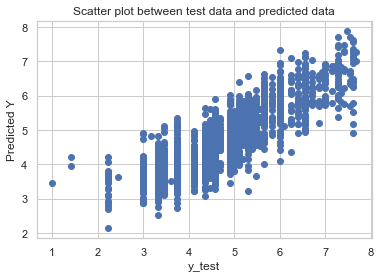

In [75]:
#LEt's plot scatter plot between test data and predicted data

plt.scatter(y_test,predxgb)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title('Scatter plot between test data and predicted data')
plt.show()

## We can observe that our model is performing well and let;s save our model and implement it on the testdataset

In [76]:
#Let's save the model

import joblib

#save the model as a pickle in a file
joblib.dump(XGB,'restaurant.pkl')

['restaurant.pkl']

# Let's load the Test Dataset

In [77]:
#Let's load the Data Set

food_test=pd.read_excel("C:/Users/Shubhham/Downloads/Data Trained/Restaurant Food Cost/Participants_Data_Final/Data_Test.xlsx")
print("Restaurants Food Cost Test Dataset has been loaded successfully")


Restaurants Food Cost Test Dataset has been loaded successfully


In [78]:
#Let's check the dataset

food_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


## Featured Engineering

### Data Cleaning

In [79]:
#Let's check the shape of our DataSet

food_test.shape

(4231, 8)

In [80]:
#Let's check the value counts in each columns

for i in food_test.columns:
    print(food_test[i].value_counts())
    print('\n')

QUICK BITES             1416
CASUAL DINING           1258
None                     284
CAFÉ                     223
DESSERT PARLOR           126
                        ... 
CASUAL DINING,LOUNGE       1
LOUNGE,FINE DINING         1
PAAN SHOP                  1
QUICK BITES,CAFÉ           1
FINE DINING,CAFÉ           1
Name: TITLE, Length: 86, dtype: int64


12799    3
15454    3
4262     3
11169    3
1619     3
        ..
9598     1
11432    1
3451     1
5496     1
10241    1
Name: RESTAURANT_ID, Length: 4127, dtype: int64


North Indian, Chinese                         213
North Indian                                  190
South Indian                                  174
Fast Food                                      78
Chinese                                        59
                                             ... 
North Indian, Rolls, Fast Food                  1
Continental, North Indian, Andhra, Chinese      1
Biryani, BBQ, North Indian, Chinese, Kebab      1
Biryani, Andhra, Nor

In [81]:
for i in food_test.columns:
    print("Unique values in", i, food_test[i].nunique())

Unique values in TITLE 86
Unique values in RESTAURANT_ID 4127
Unique values in CUISINES 1727
Unique values in TIME 1183
Unique values in CITY 151
Unique values in LOCALITY 834
Unique values in RATING 31
Unique values in VOTES 1136


In [82]:
food_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


### Observations:
    
    1- We have 4231 rows and 8 columns in our dataset
    
    2- City, Locality, Rating and  Votes have missing values in our
       dataset
        
    3- We have two types of datatypes in our dataset i.e. object and
       int64

## Data Cleaning

In [83]:
#Let's extract the closed time i.e. on which day restraunt is closed in a week in our dataset

import re
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'Open All Days'

food_test['CLOSED'] = food_test['TIME'].apply(extract_closed)

In [84]:
food_test['TIME'] = food_test['TIME'].str.replace(r'Closed \(.*?\)','')
food_test['TIME'] = food_test['TIME'].str.replace(r'Closed...','')

In [85]:
food_test['RATING'] = food_test['RATING'].str.replace('NEW', '1')
food_test['RATING'] = food_test['RATING'].str.replace('-', '1').astype(float)

In [86]:
food_test['VOTES'] = food_test['VOTES'].str.replace(' votes', '').astype(float)

In [87]:
food_test['RATING'].fillna(3.8, inplace=True)  
food_test['VOTES'].fillna(44.0, inplace=True)

In [88]:
#Let's replace the null values City and Locality columns with 'Others'

food_test.CITY.fillna("Others",inplace=True)
food_test.LOCALITY.fillna("Others",inplace=True)

In [89]:
#Let's check for the null values in our DataSet

food_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
CLOSED           0
dtype: int64

We have imputed all the missing and nan values

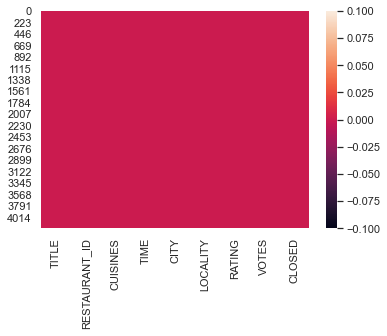

In [90]:
#Let's plot the heat map for null values

sns.heatmap(food_test.isnull())
plt.show()

From the above heatmap we can clearly say that now we do not have and missing values

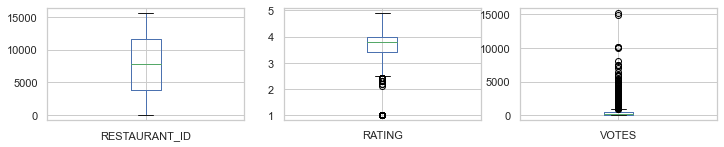

In [91]:
#Let's check the outliers

food_test.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

We can clearly observe that Rating and Votes column have outliers

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(food_test.columns)):
    food_test[food_test.columns[column]]=le.fit_transform(food_test[food_test.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [93]:
mappings

[{0: 'BAKERY',
  1: 'BAKERY,BEVERAGE SHOP',
  2: 'BAKERY,CAFÉ',
  3: 'BAKERY,CASUAL DINING',
  4: 'BAKERY,DESSERT PARLOR',
  5: 'BAKERY,QUICK BITES',
  6: 'BAR',
  7: 'BAR,CASUAL DINING',
  8: 'BAR,LOUNGE',
  9: 'BAR,PUB',
  10: 'BEVERAGE SHOP',
  11: 'BEVERAGE SHOP,CAFÉ',
  12: 'BEVERAGE SHOP,DESSERT PARLOR',
  13: 'BEVERAGE SHOP,QUICK BITES',
  14: 'BHOJANALYA',
  15: 'CAFÉ',
  16: 'CAFÉ,BAKERY',
  17: 'CAFÉ,BAR',
  18: 'CAFÉ,CASUAL DINING',
  19: 'CAFÉ,DESSERT PARLOR',
  20: 'CAFÉ,FOOD COURT',
  21: 'CAFÉ,LOUNGE',
  22: 'CAFÉ,QUICK BITES',
  23: 'CASUAL DINING',
  24: 'CASUAL DINING,BAKERY',
  25: 'CASUAL DINING,BAR',
  26: 'CASUAL DINING,CAFÉ',
  27: 'CASUAL DINING,FOOD COURT',
  28: 'CASUAL DINING,IRANI CAFE',
  29: 'CASUAL DINING,LOUNGE',
  30: 'CASUAL DINING,MICROBREWERY',
  31: 'CASUAL DINING,PUB',
  32: 'CASUAL DINING,SWEET SHOP',
  33: 'CLUB',
  34: 'CLUB,BAR',
  35: 'CLUB,CASUAL DINING',
  36: 'CLUB,FINE DINING',
  37: 'COCKTAIL BAR,CASUAL DINING',
  38: 'CONFECTIONERY',
  3

In [94]:
#Let's check for the outliers

#from scipy.stats import zscore
#z_score=abs(zscore(food_test))
#print(food_test.shape)
#food_test_final=food_test.loc[(z_score<3).all(axis=1)]
#print(food_test_final.shape)

In [95]:
#food_test=food_test_final
#food_test.shape

#### We are not removing the Outliers from our Test Dataset as it is effecting our reslt. So we have decided not to remove any outliers for test dataset

In [96]:
#Let's check the skewness of our DataSet

food_test.skew()

TITLE           -0.019891
RESTAURANT_ID    0.000021
CUISINES        -0.211171
TIME             0.308980
CITY             0.067531
LOCALITY         0.293775
RATING          -1.188102
VOTES            1.290360
CLOSED          -6.881044
dtype: float64

In [97]:
# Let's treat the skewness

food_test.skew()
for col in food_test.skew().index:
    if col in food_test.describe().columns:
        if food_test[col].skew()>0.55:
            food_test[col]=np.sqrt(food_test[col])
        if food_test[col].skew()<-0.55:
            food_test[col]=np.cbrt(food_test[col])

In [98]:
# Let's treat the skewness
for col in food.columns:
    if food[col].skew()>0.55:
        food[col]=np.log1p(food[col])

In [99]:
#Let's recheck the skewness of our DataSet

food_test.skew()

TITLE           -0.019891
RESTAURANT_ID    0.000021
CUISINES        -0.211171
TIME             0.308980
CITY             0.067531
LOCALITY         0.293775
RATING          -2.396183
VOTES            0.651259
CLOSED          -7.555612
dtype: float64

We have successfully treated the skewness in our dataset

In [100]:
#Let's assign the value of x_c to our test dataset

x_c = food_test[['TITLE','RESTAURANT_ID','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES','CLOSED']]
print(x_c.shape)

(4231, 9)


In [101]:
# Let's scale the data using standard scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_c_sc=sc.fit_transform(x_c)
x_c_sc=pd.DataFrame(x_c_sc,columns=x_c.columns)

In [102]:
#Let's load the save model from pickle

XBG_test=joblib.load('restaurant.pkl')
XBG_test

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [103]:
XBG_predict=XBG_test.predict(x_c)
XBG_predict

array([5.2971044, 6.7991357, 5.3355045, ..., 6.2370043, 6.51687  ,
       6.5191126], dtype=float32)

In [104]:
Predicted=np.exp(XBG_predict)
Predicted=Predicted.astype(int)

In [105]:
pd.DataFrame(Predicted, columns=['COST'])

,COST
0,199
1,897
2,207
3,187
4,703
...,...
4226,163
4227,155
4228,511
4229,676


In [106]:
pd.DataFrame(Predicted).rename(columns = {0 : 'COST'})

,COST
0,199
1,897
2,207
3,187
4,703
...,...
4226,163
4227,155
4228,511
4229,676


## Our model is performing better and predicting the result on our Test dataset

In [107]:
#Let's check the model and prediction on the raw test dataset

food_test_final = pd.read_excel("C:/Users/Shubhham/Downloads/Data Trained/Restaurant Food Cost/Participants_Data_Final/Data_Test.xlsx")

food_ID = food_test_final[['CUISINES']]

food_test_final = pd.concat([food_ID, pd.DataFrame(Predicted).rename(columns = {0 : 'COST'})], axis=1)

food_test_final

,CUISINES,COST
0,"North Indian, Chinese, Mughlai, Kebab",199
1,"South Indian, Fast Food, Pizza, North Indian",897
2,"North Indian, Seafood, Biryani, Chinese",207
3,Biryani,187
4,"South Indian, Kerala",703
...,...,...
4226,"North Indian, Mughlai, Chinese",163
4227,"Biryani, North Indian, Sandwich, Salad, Wraps",155
4228,"Continental, North Indian",511
4229,"Rolls, Beverages",676


## As we can observe that our model is perforing extreme well on the raw test data set also. 

In [108]:
#Let's save the predicted result into the csv file

food_test_final.to_csv('restaurant.csv',index=False)